<a href="https://colab.research.google.com/github/auraauliaalkhomisi2103-ops/auraauliaalkhomisi2103-ops-UAS-MachineLearning-Retail-aura-aulia/blob/main/Segmentasi%20Pelanggan%20Menggunakan%20Analisis%20RFM%20dan%20Algoritma%20K-Means%20pada%20Dataset%20Online%20Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# ==============================================================================
# LANGKAH 1: UPLOAD FILE DARI KOMPUTER ANDA
# ==============================================================================
from google.colab import files
import pandas as pd
import io

print("Silakan upload kedua file CSV dataset Anda...")
# Kode ini akan memunculan tombol "Choose Files"
uploaded = files.upload()

Silakan upload kedua file CSV dataset Anda...


Saving online_retail_II.xlsx - Year 2010-2011.csv to online_retail_II.xlsx - Year 2010-2011.csv
Saving online_retail_II.xlsx - Year 2009-2010.csv to online_retail_II.xlsx - Year 2009-2010.csv



✅ Kedua dataset berhasil dimuat dan digabungkan.

Memulai pembersihan data...


/tmp/ipython-input-4085509692.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


✅ Data selesai dibersihkan.

Melakukan analisis RFM...
✅ Analisis RFM selesai.

Menerapkan K-Means Clustering...
✅ Clustering selesai.

Karakteristik Segmen Pelanggan yang Ditemukan:
        Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         438.3       1.4    159.3   284
1          68.0       3.9    306.3   525
2         505.0      21.0  74807.0     1
3           5.0     150.0   7795.0     1

--- Membuat Visualisasi Hasil Analisis ---


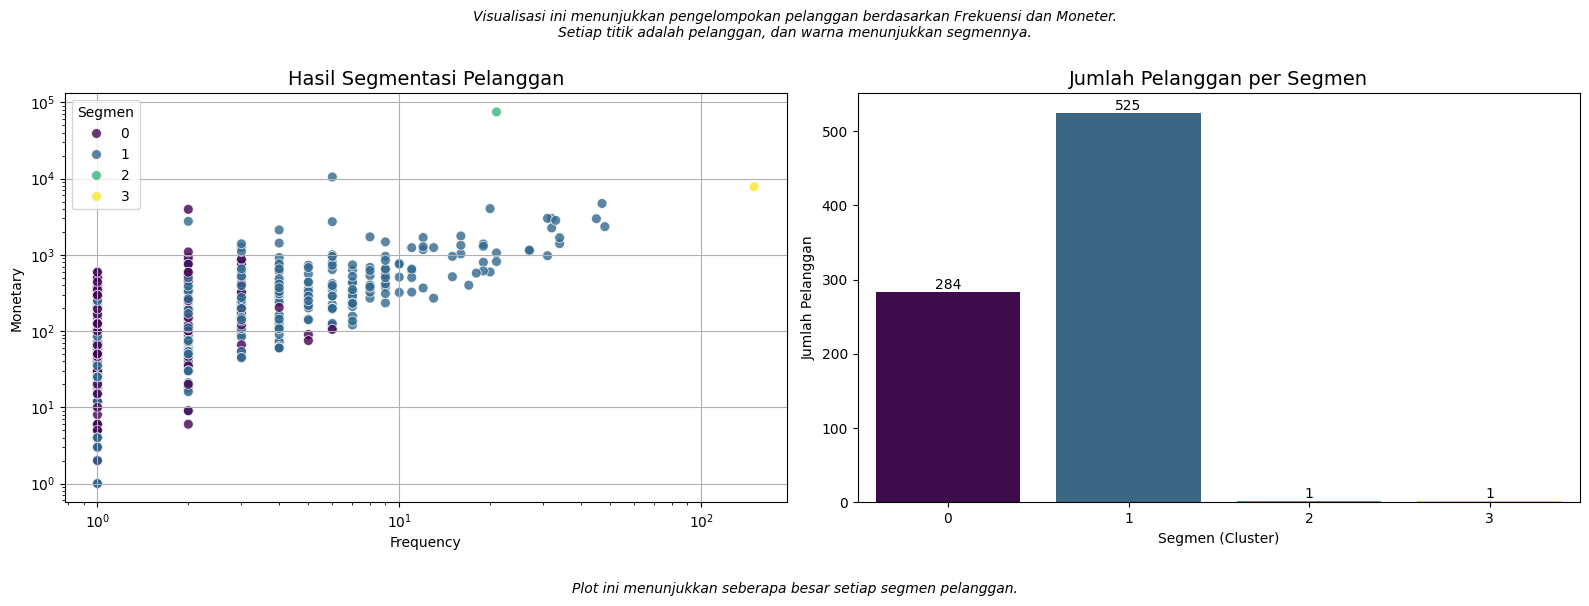

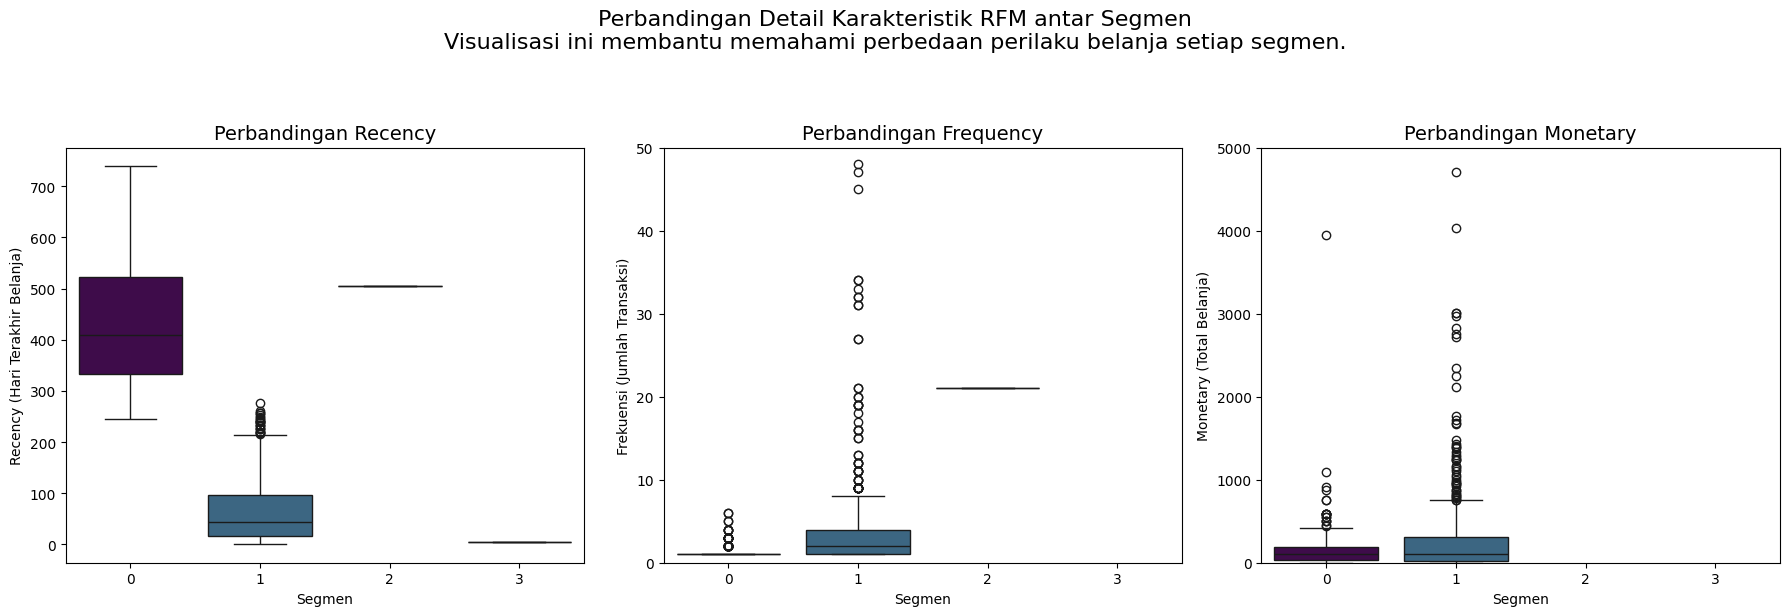


--- PROGRAM SELESAI ---


In [10]:
try:
    df1 = pd.read_csv(io.BytesIO(uploaded['online_retail_II.xlsx - Year 2009-2010.csv']), encoding='latin1')
    df2 = pd.read_csv(io.BytesIO(uploaded['online_retail_II.xlsx - Year 2010-2011.csv']), encoding='latin1')
    df = pd.concat([df1, df2], ignore_index=True)
    print("\n✅ Kedua dataset berhasil dimuat dan digabungkan.")
except (KeyError, FileNotFoundError):
    print("\n❌ GAGAL! Pastikan Anda mengupload KEDUA file CSV dengan nama yang benar.")
    exit()

print("\nMemulai pembersihan data...")
df.dropna(subset=['Customer ID'], inplace=True)
df = df[~df['Invoice'].astype(str).str.startswith('C')]
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.dropna(subset=['Quantity', 'Price'], inplace=True)
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
df['Customer ID'] = df['Customer ID'].astype(int)
df['TotalPrice'] = df['Quantity'] * df['Price']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df.dropna(subset=['InvoiceDate'], inplace=True)
print("✅ Data selesai dibersihkan.")

print("\nMelakukan analisis RFM...")
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})
rfm.rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'TotalPrice': 'Monetary'}, inplace=True)
print("✅ Analisis RFM selesai.")

print("\nMenerapkan K-Means Clustering...")
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_
print("✅ Clustering selesai.")

print("\nKarakteristik Segmen Pelanggan yang Ditemukan:")
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
print(cluster_analysis)

print("\n--- Membuat Visualisasi Hasil Analisis ---")

# --- Gambar 1: Hasil Utama Segmentasi ---
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scatter plot hasil clustering
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', s=50, alpha=0.8, ax=ax1)
ax1.set_title('Hasil Segmentasi Pelanggan', fontsize=14)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid(True)
ax1.legend(title='Segmen')
fig1.text(0.5, 0.95, 'Visualisasi ini menunjukkan pengelompokan pelanggan berdasarkan Frekuensi dan Moneter.\nSetiap titik adalah pelanggan, dan warna menunjukkan segmennya.', ha='center', va='center', fontsize=10, style='italic')


# Plot 2: Bar chart jumlah pelanggan per segmen
cluster_counts = rfm['Cluster'].value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='viridis', legend=False, ax=ax2)
ax2.set_title('Jumlah Pelanggan per Segmen', fontsize=14)
ax2.set_xlabel('Segmen (Cluster)')
ax2.set_ylabel('Jumlah Pelanggan')
for index, value in enumerate(cluster_counts.values):
    ax2.text(index, value, str(value), ha='center', va='bottom')
fig1.text(0.5, 0.01, 'Plot ini menunjukkan seberapa besar setiap segmen pelanggan.', ha='center', va='center', fontsize=10, style='italic')


plt.tight_layout(rect=[0, 0.05, 1, 0.9])
plt.show()


# --- Gambar 2: Perbandingan Detail Karakteristik RFM antar Segmen ---
fig2, (ax3, ax4, ax5) = plt.subplots(1, 3, figsize=(18, 6))
fig2.suptitle('Perbandingan Detail Karakteristik RFM antar Segmen\nVisualisasi ini membantu memahami perbedaan perilaku belanja setiap segmen.', fontsize=16, y=1.02)


# Plot 3: Box plot untuk Recency
sns.boxplot(x='Cluster', y='Recency', data=rfm, hue='Cluster', palette='viridis', legend=False, ax=ax3)
ax3.set_title('Perbandingan Recency', fontsize=14)
ax3.set_xlabel('Segmen')
ax3.set_ylabel('Recency (Hari Terakhir Belanja)')

# Plot 4: Box plot untuk Frequency
sns.boxplot(x='Cluster', y='Frequency', data=rfm, hue='Cluster', palette='viridis', legend=False, ax=ax4)
ax4.set_title('Perbandingan Frequency', fontsize=14)
ax4.set_xlabel('Segmen')
ax4.set_ylabel('Frekuensi (Jumlah Transaksi)')
ax4.set_ylim(0, 50)

# Plot 5: Box plot untuk Monetary
sns.boxplot(x='Cluster', y='Monetary', data=rfm, hue='Cluster', palette='viridis', legend=False, ax=ax5)
ax5.set_title('Perbandingan Monetary', fontsize=14)
ax5.set_xlabel('Segmen')
ax5.set_ylabel('Monetary (Total Belanja)')
ax5.set_ylim(0, 5000)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("\n--- PROGRAM SELESAI ---")